In [69]:
import warnings 
warnings.filterwarnings(action="ignore")
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score

In [2]:
data=pd.read_csv(r"C:\Users\VIRAJ\Downloads\archive (2)\predictive_maintenance.csv")
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [3]:
data["Failure Type"].value_counts()

No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: Failure Type, dtype: int64

In [4]:
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [5]:
data.drop(["UDI","Product ID"],axis=1,inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  int64  
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(3), object(2)
memory usage: 625.1+ KB


In [7]:
data["Target"]=data["Target"].astype(object)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Target                   10000 non-null  object 
 7   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 625.1+ KB


In [9]:
data.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [10]:
data["Target"].value_counts()

0    9661
1     339
Name: Target, dtype: int64

<AxesSubplot:xlabel='Failure Type', ylabel='Target'>

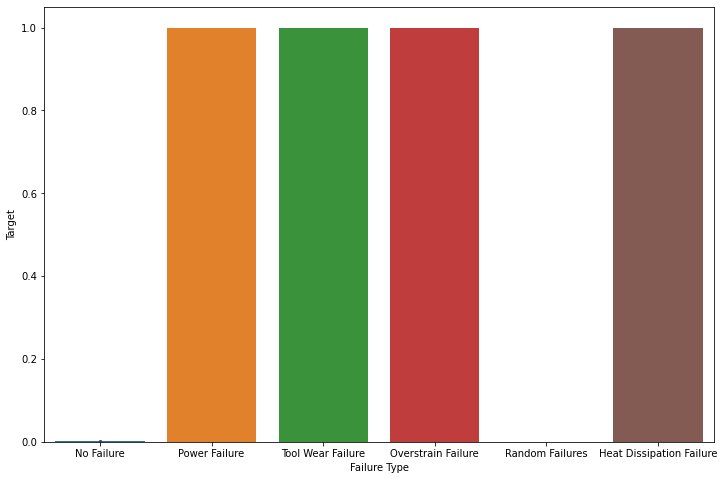

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(x="Failure Type",y="Target",data=data)

In [12]:
data.duplicated().sum()

0

In [13]:
data.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


<AxesSubplot:xlabel='Type', ylabel='count'>

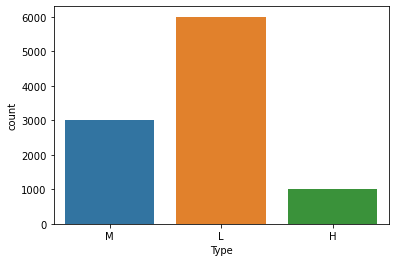

In [14]:
sns.countplot(x="Type",data=data)

In [15]:
data.corr()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
Air temperature [K],1.000000,0.876107,0.022670,-0.013778,0.013853
Process temperature [K],0.876107,1.000000,0.019277,-0.014061,0.013488
Rotational speed [rpm],0.022670,0.019277,1.000000,-0.875027,0.000223
Torque [Nm],-0.013778,-0.014061,-0.875027,1.000000,-0.003093
Tool wear [min],0.013853,0.013488,0.000223,-0.003093,1.000000


<AxesSubplot:>

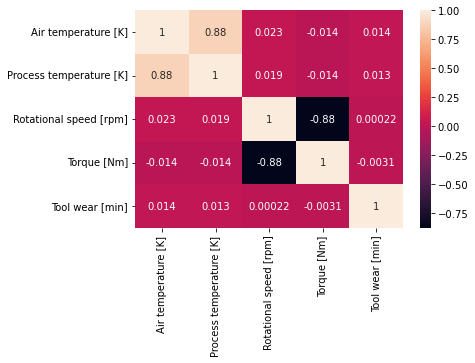

In [16]:
sns.heatmap(data.corr(),annot=True)

<AxesSubplot:xlabel='Air temperature [K]', ylabel='Density'>

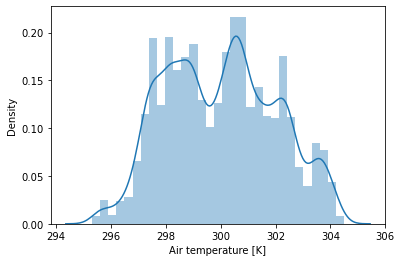

In [17]:
sns.distplot(data["Air temperature [K]"])

<AxesSubplot:xlabel='Process temperature [K]', ylabel='Density'>

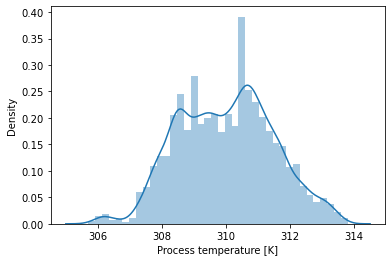

In [18]:
sns.distplot(data["Process temperature [K]"])

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Density'>

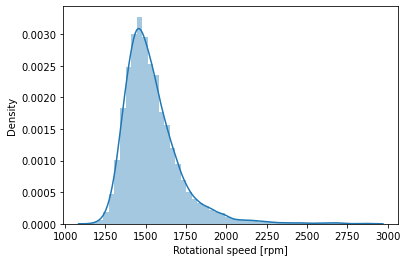

In [19]:
sns.distplot(data["Rotational speed [rpm]"])

<AxesSubplot:xlabel='Torque [Nm]', ylabel='Density'>

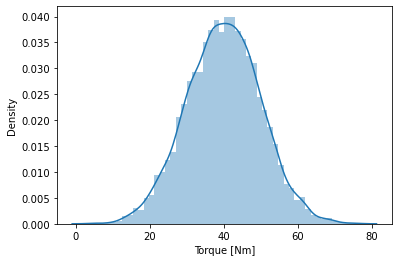

In [20]:
sns.distplot(data["Torque [Nm]"])

In [21]:
fv=data[data.columns[:-1]]
cl=data[[data.columns[-1]]]
cl

,Failure Type
0,No Failure
1,No Failure
2,No Failure
3,No Failure
4,No Failure
...,...
9995,No Failure
9996,No Failure
9997,No Failure
9998,No Failure


In [22]:
fv

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,298.1,308.6,1551,42.8,0,0
1,L,298.2,308.7,1408,46.3,3,0
2,L,298.1,308.5,1498,49.4,5,0
3,L,298.2,308.6,1433,39.5,7,0
4,L,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...,...
9995,M,298.8,308.4,1604,29.5,14,0
9996,H,298.9,308.4,1632,31.8,17,0
9997,M,299.0,308.6,1645,33.4,22,0
9998,H,299.0,308.7,1408,48.5,25,0


<AxesSubplot:xlabel='Failure Type', ylabel='count'>

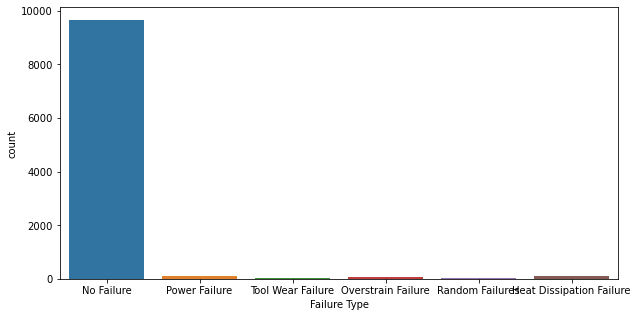

In [23]:
plt.figure(figsize=(10,5))
sns.countplot(cl["Failure Type"])

In [24]:
x_train,x_test,y_train,y_test=train_test_split(fv,cl,train_size=0.8)

In [25]:
x_train.reset_index(drop=True)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,M,297.5,308.7,1352,53.0,171,0
1,L,297.9,309.8,1336,71.6,31,1
2,L,300.9,310.6,1538,36.7,3,0
3,M,298.6,309.5,1684,27.8,44,0
4,L,300.2,310.1,1649,30.5,43,0
...,...,...,...,...,...,...,...
7995,L,297.4,307.9,1390,47.7,156,0
7996,M,302.6,311.4,1757,29.5,151,0
7997,L,298.9,308.2,1510,43.5,46,0
7998,L,300.0,309.5,1717,28.3,48,0


In [26]:
y_train.reset_index(drop=True)

,Failure Type
0,No Failure
1,Power Failure
2,No Failure
3,No Failure
4,No Failure
...,...
7995,No Failure
7996,No Failure
7997,No Failure
7998,No Failure


In [27]:
x_test.reset_index(drop=True)

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,L,298.7,309.8,1539,33.4,2,0
1,L,297.6,308.6,1491,38.1,152,0
2,L,300.2,310.3,1445,50.9,34,0
3,L,296.8,307.9,1611,35.4,72,0
4,L,299.0,310.3,1552,39.9,114,0
...,...,...,...,...,...,...,...
1995,L,298.8,308.4,1369,53.0,138,0
1996,M,300.3,311.2,1783,25.6,139,0
1997,L,299.8,309.2,1400,42.6,210,0
1998,H,297.9,308.0,1800,24.8,44,0


In [28]:
le=LabelEncoder()
train_vector=le.fit_transform(x_train.Type)
l=train_vector.tolist()
l

[2,
 1,
 1,
 2,
 1,
 2,
 0,
 0,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 0,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 2,
 1,
 0,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 0,
 2,
 2,
 2,
 0,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 0,
 2,
 0,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,


In [29]:
test_vector=le.transform(x_test.Type)
l2=test_vector.tolist()
l2

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 2,
 2,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 1,
 2,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 2,
 1,
 2,
 0,
 2,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 0,
 1,
 0,
 1,
 2,
 0,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,


In [30]:
x_train["Type"]=l

In [31]:
x_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8759,2,297.5,308.7,1352,53.0,171,0
603,1,297.9,309.8,1336,71.6,31,1
6085,1,300.9,310.6,1538,36.7,3,0
9775,2,298.6,309.5,1684,27.8,44,0
5927,1,300.2,310.1,1649,30.5,43,0
...,...,...,...,...,...,...,...
8584,1,297.4,307.9,1390,47.7,156,0
3922,2,302.6,311.4,1757,29.5,151,0
2432,1,298.9,308.2,1510,43.5,46,0
3127,1,300.0,309.5,1717,28.3,48,0


In [32]:
x_test["Type"]=l2

In [33]:
x_test

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
1423,1,298.7,309.8,1539,33.4,2,0
391,1,297.6,308.6,1491,38.1,152,0
7183,1,300.2,310.3,1445,50.9,34,0
791,1,296.8,307.9,1611,35.4,72,0
8246,1,299.0,310.3,1552,39.9,114,0
...,...,...,...,...,...,...,...
134,1,298.8,308.4,1369,53.0,138,0
7565,2,300.3,311.2,1783,25.6,139,0
2760,1,299.8,309.2,1400,42.6,210,0
268,0,297.9,308.0,1800,24.8,44,0


In [34]:
lof=LocalOutlierFactor(contamination=0.05)

In [35]:
l=lof.fit_predict(x_train,y_train)
l

array([ 1, -1,  1, ...,  1,  1,  1])

In [36]:
np.where(l==-1)

(array([   1,  104,  111,  116,  119,  150,  153,  162,  208,  215,  218,
         240,  253,  255,  264,  289,  326,  338,  342,  344,  364,  367,
         404,  415,  425,  428,  463,  491,  516,  580,  618,  624,  702,
         768,  775,  779,  780,  792,  829,  846,  854,  855,  869,  887,
         906,  912,  931,  952,  959,  979, 1010, 1040, 1045, 1093, 1144,
        1152, 1159, 1162, 1188, 1250, 1252, 1263, 1277, 1301, 1408, 1410,
        1474, 1487, 1510, 1537, 1572, 1626, 1654, 1679, 1703, 1706, 1734,
        1735, 1746, 1750, 1800, 1841, 1883, 1889, 1944, 1953, 1957, 1971,
        1978, 2012, 2028, 2043, 2050, 2059, 2077, 2113, 2119, 2120, 2144,
        2206, 2220, 2247, 2249, 2291, 2295, 2304, 2308, 2310, 2343, 2410,
        2430, 2431, 2464, 2498, 2509, 2512, 2513, 2518, 2528, 2562, 2590,
        2656, 2672, 2701, 2765, 2794, 2799, 2814, 2839, 2867, 2875, 2876,
        2884, 2941, 2976, 3055, 3076, 3099, 3102, 3103, 3115, 3126, 3131,
        3161, 3169, 3178, 3181, 3202, 

In [37]:
x_train.iloc[np.where(l==-1)]

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
603,1,297.9,309.8,1336,71.6,31,1
5033,1,304.0,313.1,1564,50.9,119,0
3854,1,302.4,311.0,1338,67.6,194,1
7823,1,300.0,311.3,1484,53.2,158,0
8028,1,300.6,311.8,1501,44.8,226,0
...,...,...,...,...,...,...,...
7580,1,300.4,311.3,1495,51.2,175,0
1682,0,297.9,307.4,1604,36.1,225,1
5063,0,304.0,312.9,1495,46.6,0,0
4731,1,303.3,311.6,1301,45.1,219,1


In [38]:
x_train.drop(x_train.iloc[np.where(l==-1)].index,inplace=True) 

In [39]:
x_train

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
8759,2,297.5,308.7,1352,53.0,171,0
6085,1,300.9,310.6,1538,36.7,3,0
9775,2,298.6,309.5,1684,27.8,44,0
5927,1,300.2,310.1,1649,30.5,43,0
4845,2,303.3,311.8,1583,33.3,72,0
...,...,...,...,...,...,...,...
8584,1,297.4,307.9,1390,47.7,156,0
3922,2,302.6,311.4,1757,29.5,151,0
2432,1,298.9,308.2,1510,43.5,46,0
3127,1,300.0,309.5,1717,28.3,48,0


In [40]:
y_train.drop(y_train.iloc[np.where(l==-1)].index,inplace=True) 

In [41]:
mms=MinMaxScaler()
x_train_std=mms.fit_transform(x_train)
x_train_std=pd.DataFrame(x_train_std,columns=x_train.columns)
x_train_std

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1.0,0.239130,0.370370,0.073579,0.701587,0.756637,0.0
1,0.5,0.608696,0.604938,0.197993,0.442857,0.013274,0.0
2,1.0,0.358696,0.469136,0.295652,0.301587,0.194690,0.0
3,0.5,0.532609,0.543210,0.272241,0.344444,0.190265,0.0
4,1.0,0.869565,0.753086,0.228094,0.388889,0.318584,0.0
...,...,...,...,...,...,...,...
7595,0.5,0.228261,0.271605,0.098997,0.617460,0.690265,0.0
7596,1.0,0.793478,0.703704,0.344482,0.328571,0.668142,0.0
7597,0.5,0.391304,0.308642,0.179264,0.550794,0.203540,0.0
7598,0.5,0.510870,0.469136,0.317726,0.309524,0.212389,0.0


In [42]:
x_test_std=mms.transform(x_test)
x_test_std=pd.DataFrame(x_test_std,columns=x_test.columns)
x_test_std

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,0.5,0.369565,0.506173,0.198662,0.390476,0.008850,0.0
1,0.5,0.250000,0.358025,0.166555,0.465079,0.672566,0.0
2,0.5,0.532609,0.567901,0.135786,0.668254,0.150442,0.0
3,0.5,0.163043,0.271605,0.246823,0.422222,0.318584,0.0
4,0.5,0.402174,0.567901,0.207358,0.493651,0.504425,0.0
...,...,...,...,...,...,...,...
1995,0.5,0.380435,0.333333,0.084950,0.701587,0.610619,0.0
1996,1.0,0.543478,0.679012,0.361873,0.266667,0.615044,0.0
1997,0.5,0.489130,0.432099,0.105686,0.536508,0.929204,0.0
1998,0.0,0.282609,0.283951,0.373244,0.253968,0.194690,0.0


In [43]:
ros=RandomOverSampler(sampling_strategy={"No Failure":9700,"Heat Dissipation Failure":9700,"Power Failure":9700,"Overstrain Failure":9700,"Tool Wear Failure":9700,"Random Failures":9700})

In [44]:
x,y=ros.fit_resample(x_train_std,y_train)

In [45]:
x_trainf=pd.DataFrame(x)
x_trainf

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,1.0,0.239130,0.370370,0.073579,0.701587,0.756637,0.0
1,0.5,0.608696,0.604938,0.197993,0.442857,0.013274,0.0
2,1.0,0.358696,0.469136,0.295652,0.301587,0.194690,0.0
3,0.5,0.532609,0.543210,0.272241,0.344444,0.190265,0.0
4,1.0,0.869565,0.753086,0.228094,0.388889,0.318584,0.0
...,...,...,...,...,...,...,...
58195,1.0,0.543478,0.740741,0.088294,0.620635,0.982301,1.0
58196,0.5,0.271739,0.395062,0.420736,0.266667,0.884956,1.0
58197,0.5,0.271739,0.395062,0.420736,0.266667,0.884956,1.0
58198,0.5,0.358696,0.506173,0.688294,0.117460,0.964602,1.0


In [46]:
y_trainf=pd.DataFrame(y)
y_trainf

,Failure Type
0,No Failure
1,No Failure
2,No Failure
3,No Failure
4,No Failure
...,...
58195,Tool Wear Failure
58196,Tool Wear Failure
58197,Tool Wear Failure
58198,Tool Wear Failure


# KNN

In [47]:
def knn_train_error(k):
    l1=[]
    for i in range(k):
        if i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_trainf,y_trainf)
            y_predicted=model.predict(x_trainf)
            accuracy=accuracy_score(y_trainf,y_predicted)
            train_error=1-accuracy
            l1.append(train_error)
    return l1

In [48]:
train_error=knn_train_error(10)
train_error

[0.0,
 0.00020618556701035295,
 0.000532646048109986,
 0.0006872852233676952,
 0.0008934707903780481]

In [49]:
x_trainf1,x_cv,y_trainf1,y_cv=train_test_split(x_trainf,y_trainf,train_size=0.7)

In [50]:
def knn_cv_error(k):
    l2=[]
    for i in range(k):
        if i%2!=0:
            knn=KNeighborsClassifier(n_neighbors=i)
            model=knn.fit(x_trainf1,y_trainf1)
            y_predicted=model.predict(x_cv)
            accuracy=accuracy_score(y_cv,y_predicted)
            cv_error=1-accuracy
            l2.append(cv_error)
    return l2

In [51]:
cv_error=knn_cv_error(10)
cv_error

[0.00022909507445589838,
 0.0006300114547537206,
 0.0010309278350515427,
 0.0013745704467353903,
 0.0014891179839633395]

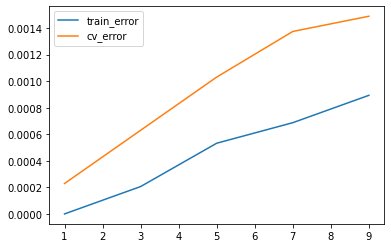

In [52]:
plt.plot([y for y in range(1,10,2)],train_error,label="train_error")
plt.plot([y for y in range(1,10,2)],cv_error,label="cv_error")
plt.legend()
plt.show()

In [53]:
knn=KNeighborsClassifier(n_neighbors=1)

In [54]:
model1=knn.fit(x_trainf,y_trainf)

In [55]:
y_predicted1=model1.predict(x_test_std)
y_predicted1

array(['No Failure', 'No Failure', 'No Failure', ..., 'No Failure',
       'No Failure', 'No Failure'], dtype=object)

In [56]:

accuracy1=accuracy_score(y_test,y_predicted1)
accuracy1

0.988

# Logistic Regression

In [57]:
tuned_parameters = [{'C': [10**-6,10**-4, 10**-2, 10**2, 10**4,10**6]}]

In [58]:
from sklearn.model_selection import GridSearchCV
model2= GridSearchCV(LogisticRegression(), tuned_parameters, scoring ="accuracy",cv=7)
final_model=model2.fit(x_trainf,y_trainf)


pr=model2.predict(x_test_std)
accuracy_score(y_test,pr)

0.693

In [59]:
m=LogisticRegression(C=0.000001)

In [60]:
m.fit(x_trainf,y_trainf)

LogisticRegression(C=1e-06)

In [61]:
y_predicted2=m.predict(x_test_std)
y_predicted2

array(['No Failure', 'No Failure', 'No Failure', ..., 'Random Failures',
       'No Failure', 'No Failure'], dtype=object)

In [62]:
accuracy2=accuracy_score(y_test,y_predicted2)
accuracy2*100

71.15

## SVM

In [70]:
model4= svm.LinearSVC()
model4.fit(x_trainf,y_trainf)

LinearSVC()

In [72]:
prediction4= model4.predict(x_test_std)
prediction4

array(['No Failure', 'Random Failures', 'No Failure', ...,
       'Random Failures', 'No Failure', 'No Failure'], dtype=object)

In [73]:
accuracy4=accuracy_score(y_test,prediction4)
accuracy4

0.6895

In [65]:
import joblib
joblib.dump(model1,r"C:\Users\VIRAJ\Desktop\machine_model.joblib")

['C:\\Users\\VIRAJ\\Desktop\\machine_model.joblib']

In [66]:
joblib.dump(le,r"C:\Users\VIRAJ\Desktop\label_encoder.joblib")

['C:\\Users\\VIRAJ\\Desktop\\label_encoder.joblib']

In [67]:
joblib.dump(mms,r"C:\Users\VIRAJ\Desktop\minmaxscalar.joblib")

['C:\\Users\\VIRAJ\\Desktop\\minmaxscalar.joblib']